In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [2]:
retail=pd.read_csv("/content/Online Retail.csv")
retail.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
retail.shape

(541909, 9)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


# DATA CLEANING

In [5]:
# finding percentage of null values in columns
round(100*(retail.isnull().sum())/len(retail),2)

index           0.00
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
retail=retail.drop("index",axis=1)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
retail=retail.dropna()
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
retail.shape

(406829, 8)

In [9]:
# new attribute monetary
retail['total_amount']=retail["Quantity"]*retail["UnitPrice"]
rfm_m=retail.groupby("CustomerID")["total_amount"].sum()
rfm_m=rfm_m.reset_index()
rfm_m.head()

<ipython-input-9-26d6f723cdb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['total_amount']=retail["Quantity"]*retail["UnitPrice"]


,CustomerID,total_amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
# new attribute frequency
rfm_f=retail.groupby("CustomerID")["InvoiceNo"].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=["CustomerID", "Frequency"]
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
# merging two dataframes
rfm=pd.merge(rfm_m,rfm_f,on='CustomerID')
rfm.head()

,CustomerID,total_amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [12]:
# new attribute: recency
retail["InvoiceDate"]= pd.to_datetime(retail["InvoiceDate"], format='%m/%d/%Y %H:%M')
retail["InvoiceDate"].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [13]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
# compute the maximum date to know the last transaction
max_date=max(retail["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
retail["diff"]=max_date - retail["InvoiceDate"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
rfm_p=retail.groupby("CustomerID")["diff"].min()
rfm_p=rfm_p.reset_index()
rfm_p.columns=["CustomerID", "diff"]
rfm_p.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
# to get exact no. of dats diff
rfm_p["diff"]= rfm_p["diff"].dt.days
rfm_p.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
rfm=pd.merge(rfm,rfm_p,on='CustomerID',how="inner")
rfm.columns=["CustomerID","total_amount","Frequency","recency"]
rfm.head()

,CustomerID,total_amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


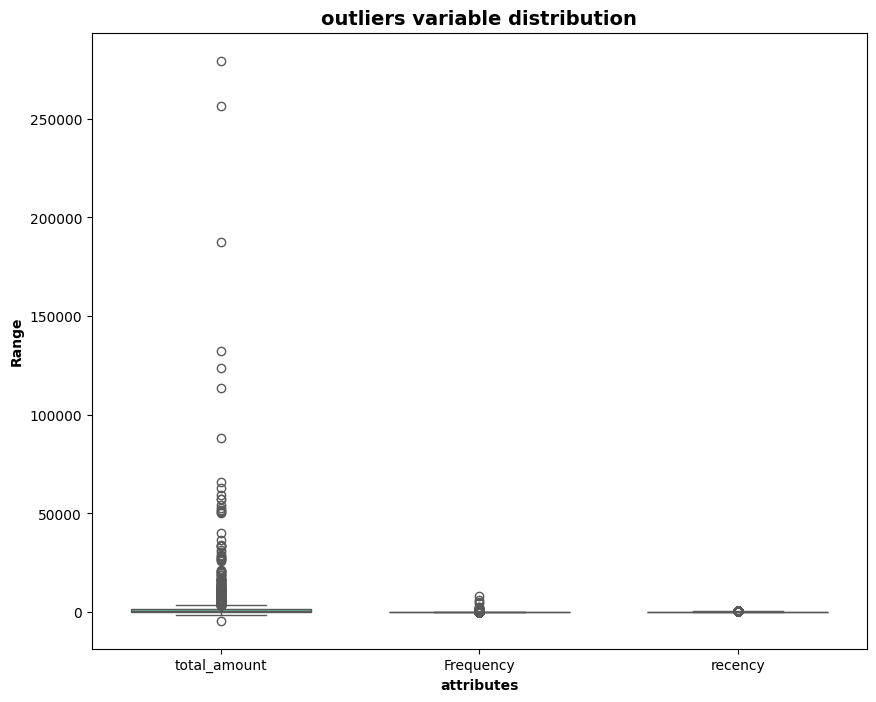

In [19]:
# outlies analysis of amount, frequency and recency
attributes=["total_amount","Frequency","recency"]
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes],orient="v",palette="Set2",whis=1.5,saturation=1,width=0.7)
plt.title("outliers variable distribution",fontsize=14,fontweight="bold")
plt.ylabel("Range",fontweight="bold")
plt.xlabel("attributes",fontweight="bold")
plt.show()

In [20]:
# removing statistical outliers for total_amount
q1=rfm.total_amount.quantile(0.05)
q3=rfm.total_amount.quantile(0.95)
iqr=q3-q1
rfm=rfm[(rfm.total_amount >=q1 - 1.5*iqr) & (rfm.total_amount <= q3 + 1.5*iqr)]

# removing statistical ouliers for recency
q1=rfm.recency.quantile(0.05)
q3=rfm.recency.quantile(0.95)
iqr=q3-q1
rfm=rfm[(rfm.recency >=q1 -1.5*iqr) & (rfm.recency <= q3 + 1.5*iqr)]

# removing statistical uotliers for frequency
q1=rfm.Frequency.quantile(0.05)
q3=rfm.Frequency.quantile(0.95)
iqr=q3-q1
rfm=rfm[(rfm.Frequency >=q1 -1.5*iqr) & (rfm.Frequency <= q3 + 1.5*iqr)]

# scaling the features

In [21]:
rfm_df=rfm[["total_amount","Frequency","recency"]]
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)



In [22]:
rfm_df_scaled.shape

(4293, 3)

In [23]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)

In [24]:
rfm_df_scaled.columns=["total_amount","Frequency","recency"]

#Model building

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [26]:
kmeans.labels_

array([0, 1, 3, ..., 0, 3, 3], dtype=int32)

In [27]:
set(kmeans.labels_)

{0, 1, 2, 3}

# Elbow curve to get right number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

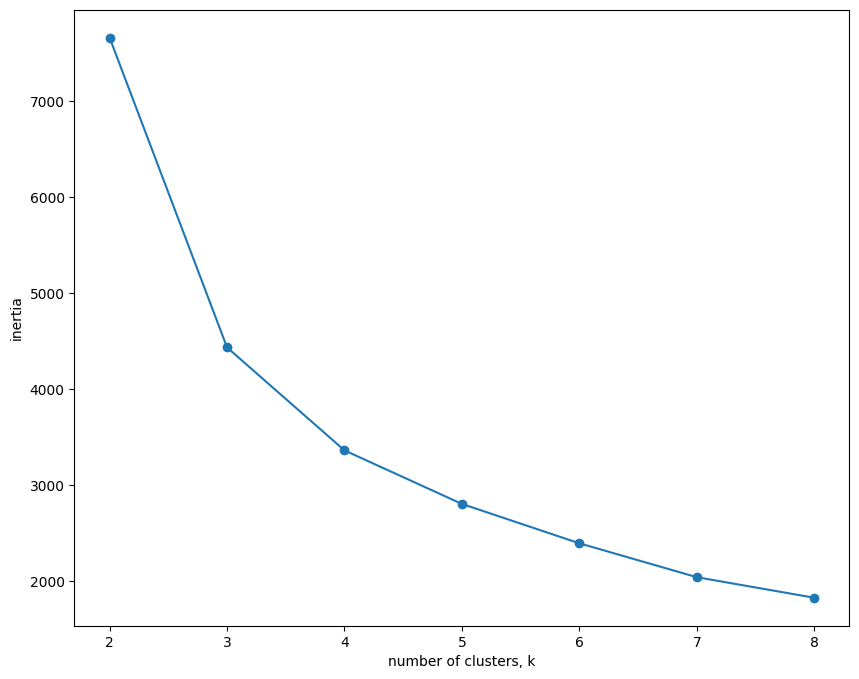

In [31]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(rfm_df_scaled)

  ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range_n_clusters)
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)